In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

# Load your flight delay data
# Assuming you have a DataFrame with 'date' and 'delay' columns
# Replace 'your_data.csv' with your file
data = pd.read_csv('/content/final_preprocessed_data.csv')

In [2]:
data


,Unnamed: 0,Year,FlightDate,DOT_ID_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginCityName,OriginWac,DestAirportID,...,AirTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings,CancellationCode_encoded
0,0,2024,7/6/2024,19930,N528AS,339,12892,"Los Angeles, CA",91,12264,...,267.0,1,2288,0.0,0.0,0.0,0.0,0.0,0,0
1,1,2024,7/25/2024,19393,N256WN,1016,12266,"Houston, TX",74,11292,...,115.0,1,862,0.0,0.0,0.0,0.0,0.0,0,0
2,2,2024,7/14/2024,19790,N554NW,2925,13931,"Norfolk, VA",38,10397,...,78.0,1,516,0.0,0.0,0.0,0.0,0.0,0,0
3,3,2024,7/17/2024,19790,N578DN,903,10397,"Atlanta, GA",34,14747,...,287.0,1,2182,0.0,0.0,0.0,0.0,0.0,0,0
4,4,2024,7/21/2024,19805,N827NN,2334,15304,"Tampa, FL",33,11298,...,132.0,1,929,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548755,548755,2022,12/7/2022,19977,N824UA,415,11292,"Denver, CO",82,14457,...,47.0,1,300,0.0,0.0,0.0,0.0,0.0,0,0
548756,548756,2022,12/7/2022,19393,N8574Z,1645,10821,"Baltimore, MD",35,11193,...,76.0,1,430,0.0,0.0,0.0,0.0,0.0,0,0
548757,548757,2022,12/12/2022,20304,N185SY,3307,14747,"Seattle, WA",93,10713,...,58.0,1,399,0.0,0.0,0.0,0.0,0.0,0,0
548758,548758,2022,12/22/2022,20436,N312FR,663,11292,"Denver, CO",82,14771,...,140.0,1,967,0.0,109.0,0.0,0.0,0.0,0,0


In [4]:
data['FlightDate'] = pd.to_datetime(data['FlightDate'], format='%m-%d-%y')

# Step 3: Sort the Data by FlightDate
data = data.sort_values(by='FlightDate')

# Optional: Resetting the index after sorting
data.reset_index(drop=True, inplace=True)

# Display the sorted data
print(data.head())  # Display first few rows of the sorted DataFrame

   Unnamed: 0  Year FlightDate  DOT_ID_Reporting_Airline Tail_Number  \
0      355056  2022 2022-01-01                     19805      N754AN   
1      353166  2022 2022-01-01                     20409      N187JB   
2      359900  2022 2022-01-01                     19393      N8688J   
3      348372  2022 2022-01-01                     19805      N654AW   
4      362373  2022 2022-01-01                     19790      N819DX   

   Flight_Number_Reporting_Airline  OriginAirportID       OriginCityName  \
0                              362            12892      Los Angeles, CA   
1                              470            11697  Fort Lauderdale, FL   
2                             1762            10800          Burbank, CA   
3                             2723            15376           Tucson, AZ   
4                             1470            10397          Atlanta, GA   

   OriginWac  DestAirportID  ... AirTime  Flights  Distance  CarrierDelay  \
0         91          13303  ... 

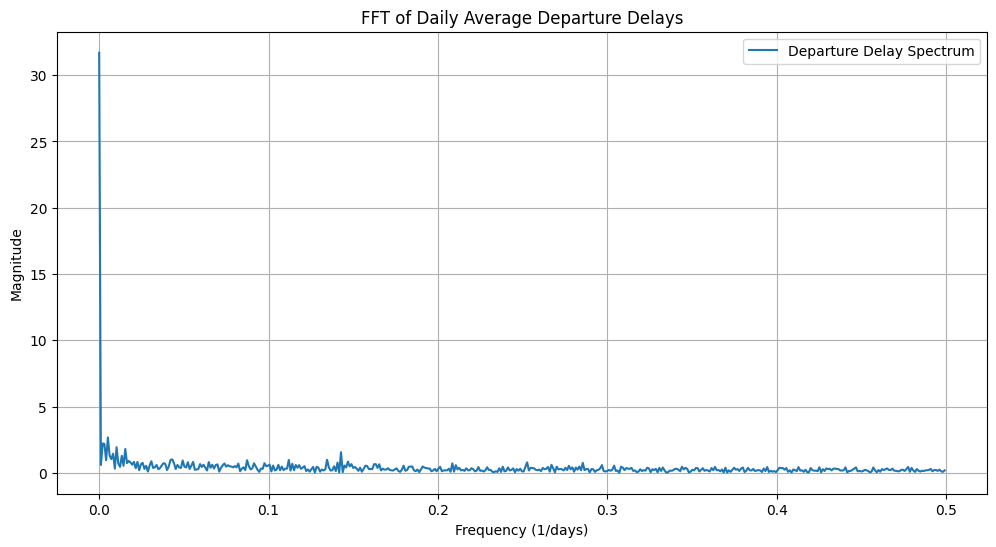

In [5]:
daily_delays = data.groupby('FlightDate').agg({
    'DepDelayMinutes': 'mean',
    'ArrDelayMinutes': 'mean'
}).dropna()

# Step 5: Select a Delay Type for FFT Analysis (e.g., Departure Delay)
delay_values = daily_delays['DepDelayMinutes'].values

# Step 6: Define Sample Parameters
N = len(delay_values)     # Number of sample points
T = 1.0                   # Sample spacing (1 day if daily data)

# Step 7: Apply FFT to Departure Delays
yf = fft(delay_values)
xf = fftfreq(N, T)[:N//2]

# Step 8: Plot the Frequency Spectrum for Departure Delays
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), label='Departure Delay Spectrum')
plt.title('FFT of Daily Average Departure Delays')
plt.xlabel('Frequency (1/days)')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()
plt.show()

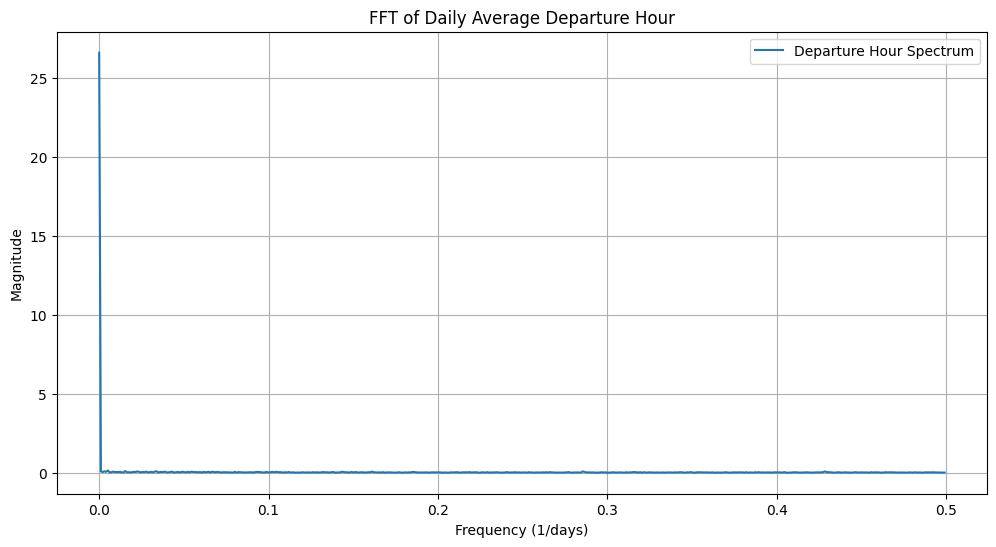

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


# Step 4: Create Additional Time Features
# Assuming `DepTime` and `ArrTime` are in HHMM format, convert to hours
data['DepHour'] = (data['DepTime'] // 100) + (data['DepTime'] % 100) / 60.0
data['ArrHour'] = (data['ArrTime'] // 100) + (data['ArrTime'] % 100) / 60.0

# Step 5: Convert Day of the Week to Numerical Format
data['DayOfWeek'] = data['FlightDate'].dt.dayofweek  # Monday=0, Sunday=6

# Step 6: Aggregate Delay Data by Day for FFT Analysis
# Here we can take the mean of delays for daily analysis
daily_data = data.groupby('FlightDate').agg({
    'DepDelayMinutes': 'mean',
    'ArrDelayMinutes': 'mean',
    'DepHour': 'mean',
    'ArrHour': 'mean',
    'CarrierDelay': 'mean',
    'WeatherDelay': 'mean',
    'NASDelay': 'mean',
    'SecurityDelay': 'mean',
    'LateAircraftDelay': 'mean',
    'DayOfWeek': 'mean'
}).dropna()

# Step 7: Select a Feature for FFT Analysis (e.g., Departure Hour)
feature_values = daily_data['DepHour'].values  # Change to other features as needed

# Step 8: Define Sample Parameters
N = len(feature_values)     # Number of sample points
T = 1.0                     # Sample spacing (1 day if daily data)

# Step 9: Apply FFT
yf = fft(feature_values)
xf = fftfreq(N, T)[:N//2]

# Step 10: Plot the Frequency Spectrum for the Selected Feature
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), label='Departure Hour Spectrum')
plt.title('FFT of Daily Average Departure Hour')
plt.xlabel('Frequency (1/days)')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()
plt.show()
